# MNIST

fetch mnist data using sklearn

In [4]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1, as_frame=False)
# mnist.keys()


save mnist dataset

In [5]:
import joblib
# joblib.dump(mnist, "minist.pkl")
mnist = joblib.load("./minist.pkl")

In [6]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)
X

(70000, 784)
(70000,)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

display one of the images using matplotlib

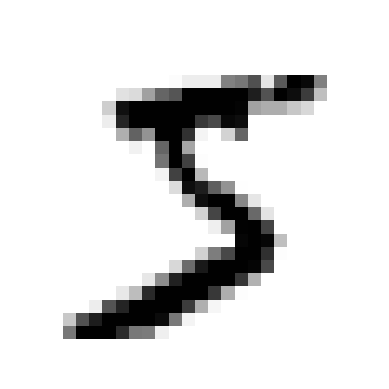

5

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
y = y.astype(np.uint8)
y[0]

splitting training and test set

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Training a Binary Classifier

to identify only one digit from other digit

In [9]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)
y_train_5

array([ True, False, False, ...,  True, False, False])

Stochastic Gradient Descent (SGD) classifier

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

now we can use the model to detect images of the number 5

In [11]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

### Measuring Accuracy Using Cross-Validation

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

this does not work well when the data is skewed towards one value. eg here, only about 10% of the data are images of 5

### Confusion Matrix

before getting confusion matrix, there must be some predictions that the classifier has never seen before. sklearn cross_val_predict will do that for us

cross_val_predict does the same thing as cross_val_score, but instead of returning scores on each test fold, it returns predictions made by the model

In [13]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [14]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

now we can get the confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[5947, 6748, 6026, 5989, 5847,  195, 5914, 6214, 5762, 5937],
       [  20,    9,    9,   64,   12, 5198,   53,    6,   31,   19],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

# Precision and Recall

precision - how correct the classifier is when it detects a number in particular class

precision = TP / (TP + FP)

recall - how much of the total number the classifier detects

recall = TP / (TP + FN)

In [15]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred)) # == 4096 / (4096 + 1522)
print(recall_score(y_train_5, y_train_pred)) # == 4096 / (4096 + 1325)

0.8370879772350012
0.6511713705958311


we often use combination of precision and recall, which is called F1 score. it is harmonic mean of precision and recall. which means it favors classifiers that have similiar precision and recall

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

### Precision/Recall Tradeoff

if precision increases, recall decreases and vice versa.

we can change precision or recall using decision threshold. we can't change threshold of sklearn model directly, but we can use decision scores that it uses to make predictions and then we can use whatever threshold we want. All we have to do is set the value of method to "decision_function" when calling the function.

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")

In [20]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

now using this y_scores we can change the output of y predictions by using different thresholds

In [25]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred[0]

True

In [23]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred[0]

False

Now with these scores we can compute precision and recall for all possible thresholds using the precision_recall_curve() function

In [26]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

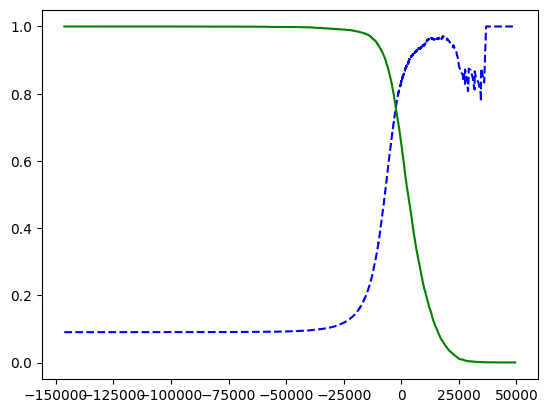

In [62]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

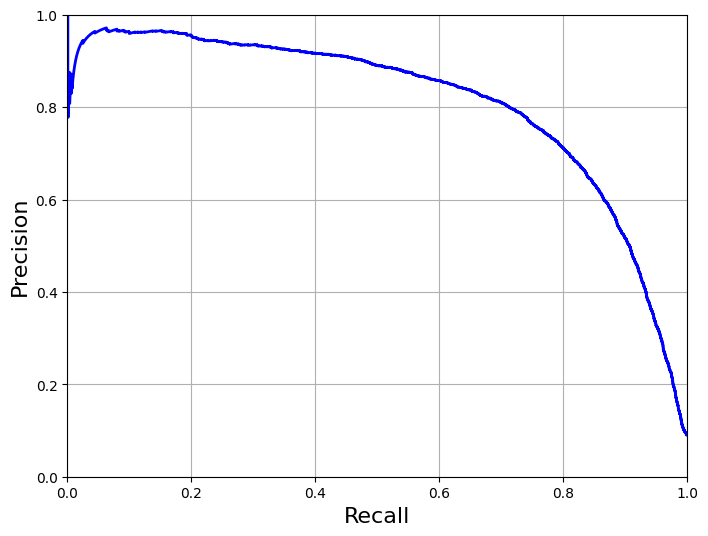

In [65]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

# The ROC Curve

ROC curve plots the true positive rate (another name for recall) against the false positive rate.

In [66]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

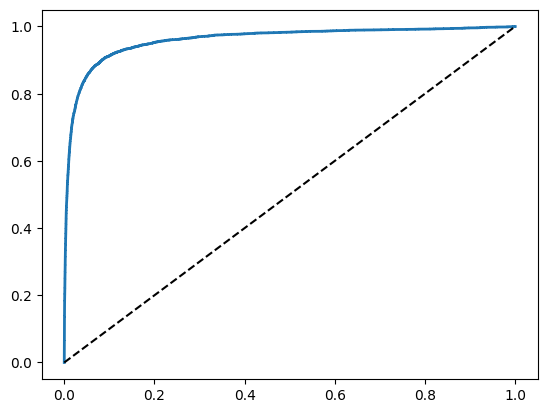

In [67]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plot_roc_curve(fpr, tpr)
plt.show()

the closer the value of ROC AUC to 1, the better it is. a random classifier has ROC AUC value equal to 0.5

In [69]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [71]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [72]:
roc_auc_score(y_train_5, y_scores_forest)
0.9983436731328145

0.9983436731328145

# Multiclass Classification

we can still use sgd classifier for multiclass classification, but under the hood, Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the image, and selected the class with the highest score.

In [31]:
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

Random Forest classifier or naive Bayes classifier are capable of handling multiple classes directly.

In [29]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [30]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

# Error Analysis

we can analysis the error based on confusion matrix

just like before, we have to first make predictions using the cross_val_predict() function, then call the confusion_matrix() function

In [ ]:
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

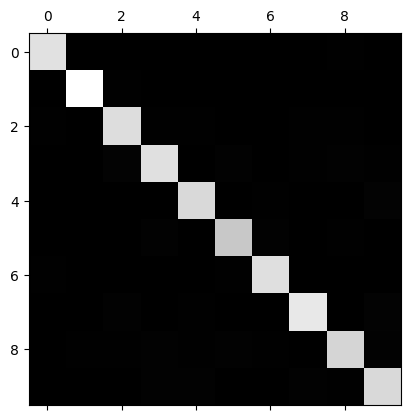

In [37]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

# Multilabel Classification

In [38]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [39]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")